<a href="https://colab.research.google.com/github/cz101/CTATrainLinesMap/blob/gh-pages/cztflinerclassfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.feature_names

In [ ]:
data.data.shape

(569, 30)

In [ ]:
print(data.target)

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(data.data,data.target,test_size=0.33)
N,D = X_train.shape 

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Input(shape=(D,)),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                ])


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
r= model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 29ms/step - loss: 138.8750 - accuracy: 0.6247 - val_loss: 140.2200 - val_accuracy: 0.6330
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 126.8771 - accuracy: 0.6247 - val_loss: 127.2505 - val_accuracy: 0.6330
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 114.6313 - accuracy: 0.6247 - val_loss: 114.5097 - val_accuracy: 0.6330
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 102.4022 - accuracy: 0.6247 - val_loss: 101.8578 - val_accuracy: 0.6330
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 90.7106 - accuracy: 0.6247 - val_loss: 88.8698 - val_accuracy: 0.6330
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 78.6254 - accuracy: 0.6247 - val_loss: 76.1222 - val_accuracy: 0.6330
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 66.4682 - accuracy: 0.6247 - val_loss: 63.5682 - val_accurac

In [ ]:
print("Train score:",model.evaluate(X_train,y_train))
print("Test score:",model.evaluate(X_test,y_test))

12/12 [==============================] - 0s 3ms/step - loss: 0.6215 - accuracy: 0.8740
Train score: [0.6214832663536072, 0.874015748500824]
6/6 [==============================] - 0s 3ms/step - loss: 0.6145 - accuracy: 0.8723
Test score: [0.6145105361938477, 0.8723404407501221]


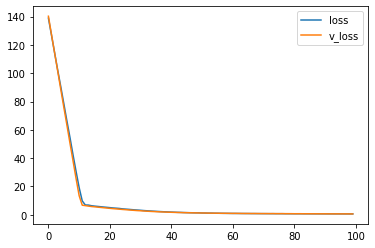

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='v_loss')
plt.legend()

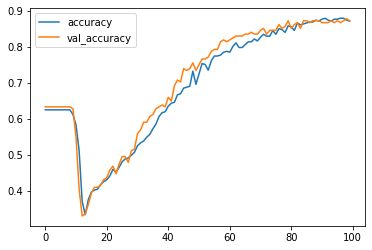

In [44]:

plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()